n          Time (ms)      
-------------------------
10         0.0370         
50         0.3829         
100        0.4187         
200        0.6402         
500        1.9786         
1000       2.9860         
2000       6.9380         
4000       13.8540        
5000       17.5862        
10000      39.4750        


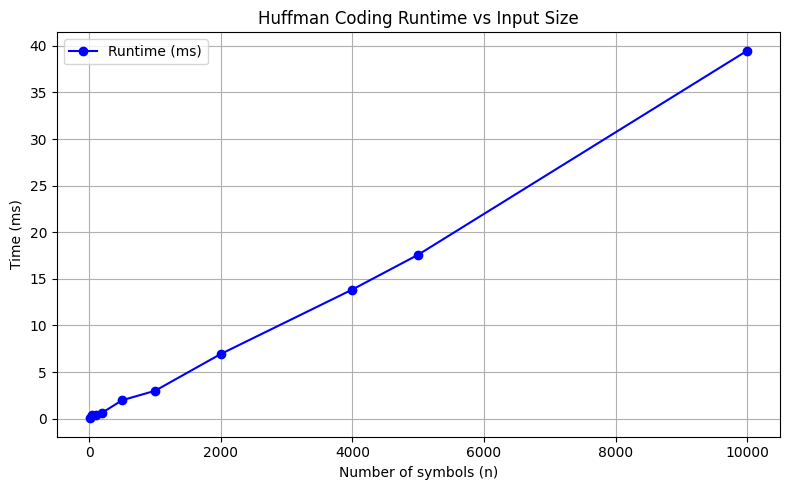

In [1]:
import heapq
import time
import random
import string
import matplotlib.pyplot as plt

# -----------------------------
# Node class for Huffman Tree
# -----------------------------
class Node:
    def __init__(self, symbol, freq):
        self.symbol = symbol
        self.freq = freq
        self.left = None
        self.right = None

    # For priority queue comparison
    def __lt__(self, other):
        return self.freq < other.freq


# -----------------------------
# Build Huffman Tree
# -----------------------------
def build_huffman_tree(frequencies):
    heap = []
    for symbol, freq in frequencies.items():
        heapq.heappush(heap, Node(symbol, freq))

    while len(heap) > 1:
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)

        new_node = Node(None, left.freq + right.freq)
        new_node.left = left
        new_node.right = right

        heapq.heappush(heap, new_node)

    return heap[0]  # root node


# -----------------------------
# Assign codes recursively
# -----------------------------
def assign_codes(node, current_code="", code_map=None):
    if code_map is None:
        code_map = {}

    if node.symbol is not None:
        code_map[node.symbol] = current_code
        return code_map

    if node.left:
        assign_codes(node.left, current_code + "0", code_map)
    if node.right:
        assign_codes(node.right, current_code + "1", code_map)

    return code_map


# -----------------------------
# One Huffman experiment run
# -----------------------------
def huffman_experiment(n):
    # Create n unique symbols
    symbols = random.sample(string.ascii_letters + string.digits, k=min(n, 62))
    # If n > 62, create artificial symbols
    while len(symbols) < n:
        symbols.append('S' + str(len(symbols)))

    # Assign random frequencies
    frequencies = {symbol: random.randint(1, 100) for symbol in symbols}

    start = time.time()
    root = build_huffman_tree(frequencies)
    codes = assign_codes(root)
    end = time.time()

    return (end - start) * 1000  # return milliseconds


# -----------------------------
# Run multiple tests & plot
# -----------------------------
def run_tests_and_plot():
    input_sizes = [10, 50, 100, 200, 500, 1000, 2000, 4000, 5000, 10000]
    times = []

    print(f"{'n':<10} {'Time (ms)':<15}")
    print("-" * 25)

    for n in input_sizes:
        t = huffman_experiment(n)
        times.append(t)
        print(f"{n:<10} {t:<15.4f}")

    # Plot line graph
    plt.figure(figsize=(8, 5))
    plt.plot(input_sizes, times, marker='o', linestyle='-', color='blue', label='Runtime (ms)')
    plt.xlabel("Number of symbols (n)")
    plt.ylabel("Time (ms)")
    plt.title("Huffman Coding Runtime vs Input Size")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    run_tests_and_plot()


In [3]:
####### CLAUDE ######